# Machine Learning study project<br>
Data source: https://www.kaggle.com/uciml/autompg-dataset<br>
Project guide: https://colab.research.google.com/drive/1P9DJIDsaTosUkdSNDHCLb-aHLX4LMk56#scrollTo=bxWT5W58GftX<br>
<br>
On this first ML project I will simply follow the steps from the project guide to become familiar with the main tools used on this kind of process.<br>
Libraries used:
- Pandas;
- Sklearn;
- Numpy.

In [16]:
# First let's import what we are going to use:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [17]:
# Now let's import the dataset and have a look at the first rows:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We have already a MPG - Miles Per Gallon - column, that means we can create a ML to predict the results and after compare with the dataset to check how accurate the model is.

With a first look at the dataset, we can already think about columns that would be usefull and the ones that won't help the MPG prediction.<br>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a233b0630>,
      dtype=object)

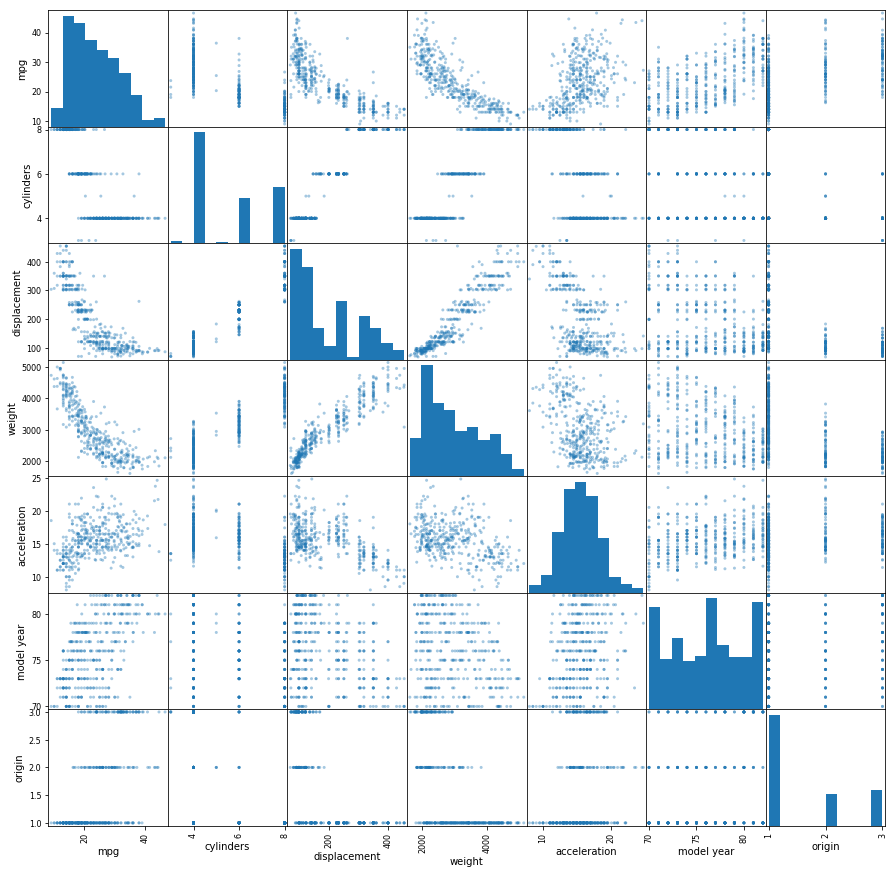

In [18]:
# Let's create a scatter matrix to try to find correlactions:
# from the documentation - alpha : float, optional - amount of transparency applied
pd.plotting.scatter_matrix(df, alpha= 0.4, figsize= (15,15))

We can see that:
- cylinders, displacement and weight are negatively correlated with MPG;
- accelaration and model seem to be positively correlated with MPG, but we could explore more this correlation, but for this learning project we are not going too deep into the Analysis.

# Introducing TEST-TRAIN-SPLIT concept
It is important to understand the concepts of Overfitting vs Underfitting:
- Overfitting is when your model uses training data and find correlations that may not exist;
- Underfitting is when your model doesn't find enough correlations to be able to predict corretly.<br>
<br>
The sklearn library offers a build in tool to help us to find the happy medium between the two extremes.<br>
So, we are going to split our data in: X_train, y_train, X_test and y_test.<br>
Note that using capital X is just a convetion when creating ML models.

In [19]:
# FIRST LET'S CREATE THE TARGET (y), ON THIS CASE, THE TARGET IS THE MILES PER GALLON:
y = df.pop('mpg') #.pop will transform the collumn into a series, and remove the column from the dataframe.

# NOW LET'S CREATE A LARGE MATRIX (X) CONTAINING THE COLUMNS THAT WE IDENTIFIED CORRELATION:
X = df[['displacement','cylinders','weight','acceleration','model year']]

# Import the necessary library from Sklearn:
from sklearn.model_selection import train_test_split

# AND FINALLY IT'S MAGIC TIME! LET'S SPLIT THE DATA USING THE SKLEARN TOOL:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

If you are like me, still not very familiar with the documentation from train_test_split, let's check some definitions to help us to understand what we just did:<br>
- <b>test_size : float, int or None, optional (default=0.25)</b><br>
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.<br>
<br>
- <b>random_state : int, RandomState instance or None, optional (default=None)</b><br>
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.

# The mistery of LINEAR REGRESSION:
Being a begginer at the Data Science world can be tough, and if you are not familiar with statistics, it can be even harder.
<br>

One of the most important concepts we use not just for ML but also in many other areas of the Data Analysis world is the Linear Regression. I won't write too much about it, as it is not the main point of this exercise, but I'll leave the formal definition of what Linear Regression is:
<br>

<i>"Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x)."</i>
<br>

So now let's use Linear Regression in our model!

In [21]:
# Import the module:
from sklearn.linear_model import LinearRegression

# Initilize the object:
reg = LinearRegression()

# Train on the trainning data:
reg.fit(X_train, y_train)

# Predict on the X set:
predictions = reg.predict(X_test)

Let's have a look at the coeficients of our model:

In [22]:
list(zip(X_train.columns,reg.coef_))

[('displacement', -0.0054794772968171845),
 ('cylinders', 0.2255864614674253),
 ('weight', -0.0064724732205297085),
 ('acceleration', 0.0703651600470635),
 ('model year', 0.7878060025258703)]

We can check how far we are on average from the real MPG value:

In [25]:
mean_error = np.sqrt(np.mean((y_test - predictions) ** 2))
# np.sqrt is the Numpy method to calculate Square-root

print('On average we are: ',np.round(mean_error),' off from actual mpg value')

On average we are:  3.0  off from actual mpg value


The value of 3.0 can be considered a low one, what makes the model we've built a pretty good one. Based on that, we can write a function to predict a MPG based on the values we provide. This is basically the essence of a ML model, making the computer make a predicition with the tool it learned.

In [26]:
def predict(displacement, cylinders, weight, acceleration, model_year):
    # create predictions:
    prediction = reg.predict([[displacement, cylinders, weight, acceleration, model_year]])
    
    print("Your Predicted MPG is: ", np.round(prediction[0]))

Let's check again the first rows of the dataset, pick one, put the values and run the function to check how it works:

In [27]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,8,302.0,140,3449,10.5,70,1,ford torino


In [28]:
# We will use the fourth row (3):
displacement = 304
cylinders = 8
weight = 3433
acceleration = 12
model_year = 70

predict(displacement, cylinders, weight, acceleration, model_year)

Your Predicted MPG is:  16.0


# Conclusion:
<br>
If we check at the begining of the project, the MPG projected is exactly the same one on the previous mpg column.<br>
Of course it doesn't mean the ML is perfect, but it is quite acurate for the purpose of this first study.
<br>

The important thing after training a first ML is to do more projects e get more and more familiar with the workflow you need to perform in order to create good predictions. I believe it will quite natural start to look for more complex challenges as further as we progress learning this amazing and exciting world!